<a href="https://colab.research.google.com/github/Ellana555/PythonBase/blob/main/10_visual_graffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import  pandas as pd
# Датасет с посещением ресторанов
#  total_bill — общая сумма, уплаченная за заказ;
#  tip — размер чаевых;
#  sex — пол клиента;
#  smoker — является ли клиент курильщиком (в 90-е годы в ресторанах США были зоны для курящих);
#  day — день недели;
#  time — время (обед или ужин);
#  size — количество посетителей, обедавших за столом.
df = pd.read_csv('/content/drive/MyDrive/Python/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.shape
df['total_bill'].max()

50.81

In [ ]:
# Для автоматического вывода графиков
%matplotlib inline

<Axes: >

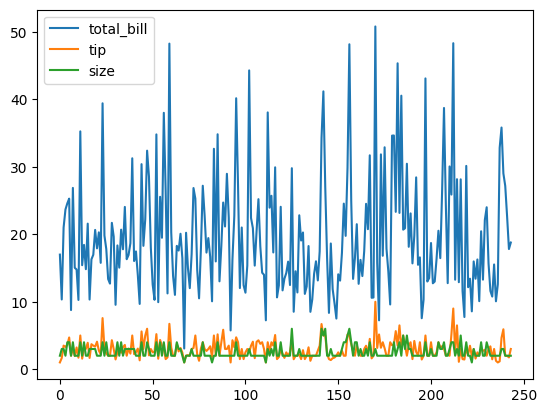

In [ ]:
df.plot()

<Axes: ylabel='Frequency'>

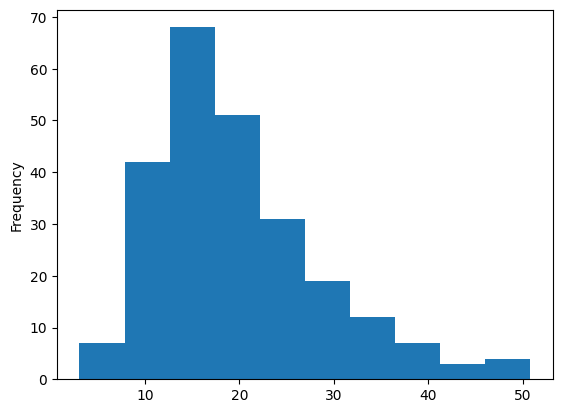

In [ ]:
# гистограмма распределения признака
df['total_bill'].plot(kind = 'hist')

<Axes: title={'center': 'Общая сумма счёта'}, ylabel='Frequency'>

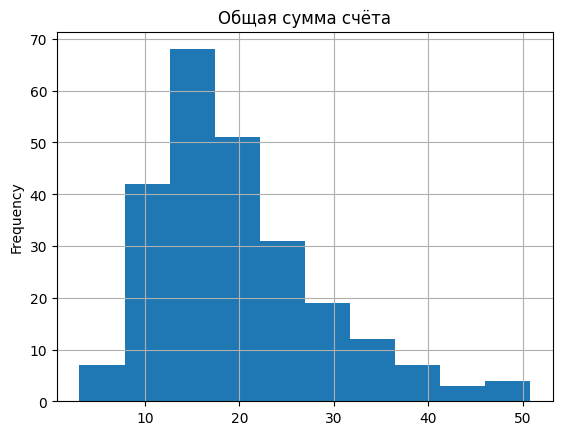

In [ ]:
df['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')

<Axes: title={'center': 'Количество посетителей по дням'}, xlabel='day'>

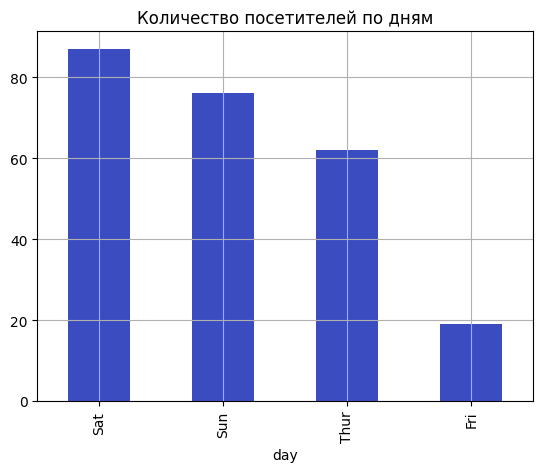

In [ ]:
df['day'].value_counts().plot(kind='bar',
                              grid = True,
                              colormap = 'coolwarm',
                              title = 'Количество посетителей по дням')

<Axes: xlabel='sex,smoker'>

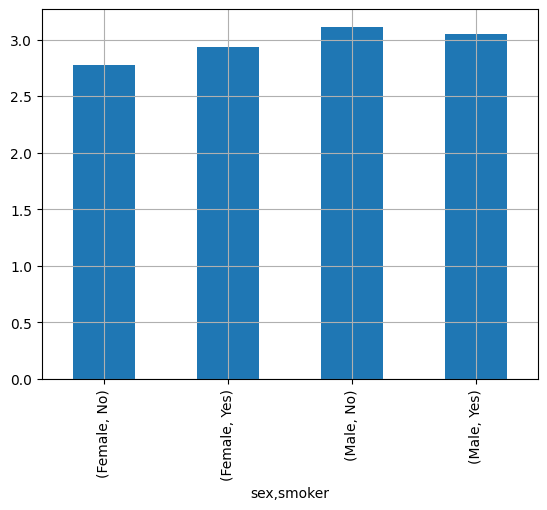

In [ ]:
df.groupby(by = ['sex', 'smoker'])['tip'].mean().plot(kind = 'bar', grid= True)

10.3 Отображение двух показателей на графике

array([<Axes: title={'center': 'Общая сумма счёта'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Сумма чаевых'}, ylabel='Frequency'>],
      dtype=object)

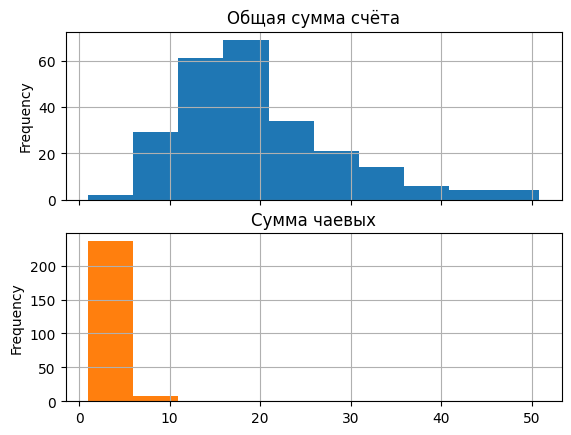

In [ ]:
df[['total_bill', 'tip']].plot(kind = 'hist',
                               grid = True,
                               subplots = True,
                               title = ['Общая сумма счёта', 'Сумма чаевых'],
                               legend = False)

<Axes: title={'center': 'Общая сумма счёта Vs сумма чаевых'}, xlabel='total_bill', ylabel='tip'>

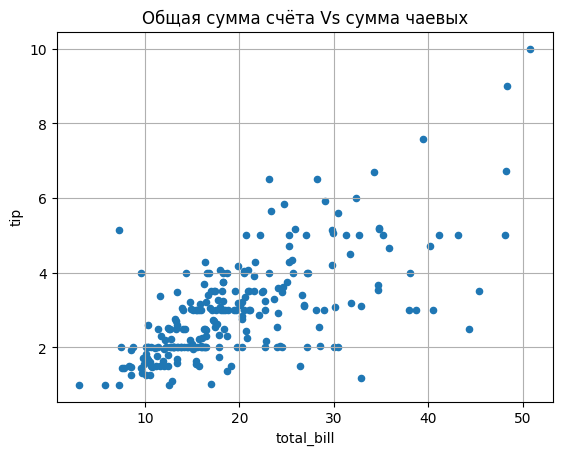

In [ ]:
df.plot(x = 'total_bill',
        y = 'tip',
        kind = 'scatter',
        grid = True,
        title = 'Общая сумма счёта Vs сумма чаевых')

<Axes: xlabel='day'>

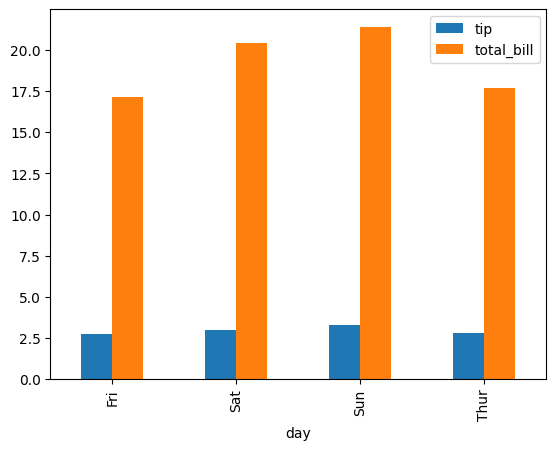

In [ ]:
df.pivot_table(values = ['total_bill', 'tip'],
               index = 'day',
               aggfunc = 'mean').plot(kind = 'bar')

<Axes: xlabel='sex,smoker'>

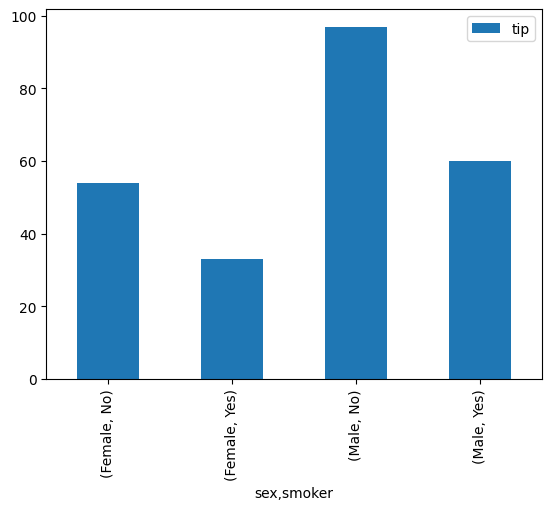

In [ ]:
df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count').plot(kind = 'bar')

<Axes: xlabel='smoker'>

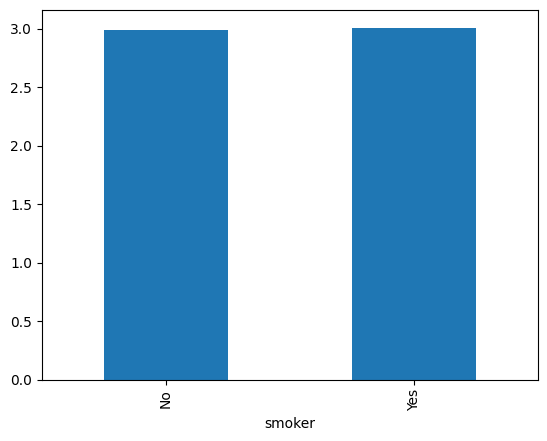

In [ ]:
df.groupby('smoker')['tip'].mean().plot(kind = 'bar')

 10.4 Объектно-ориентированный подход

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib

inlinedf = pd.read_csv('/content/drive/MyDrive/Python/tips.csv')

Using matplotlib backend: <object object at 0x786faa80efc0>


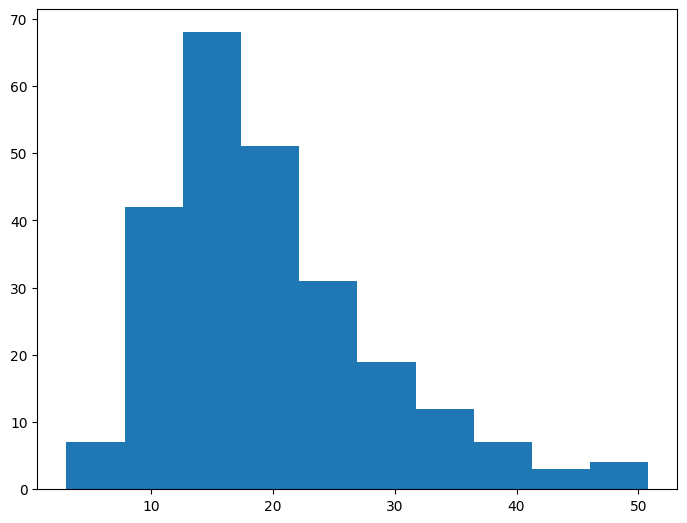

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'])
fig

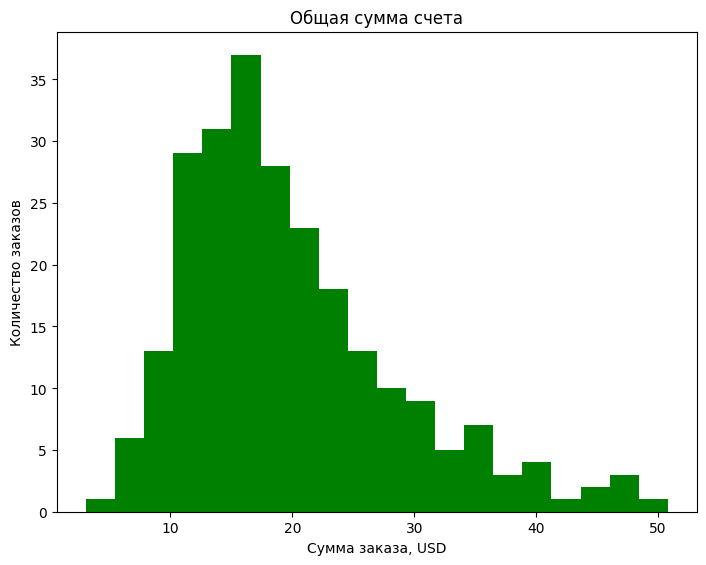

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')
fig

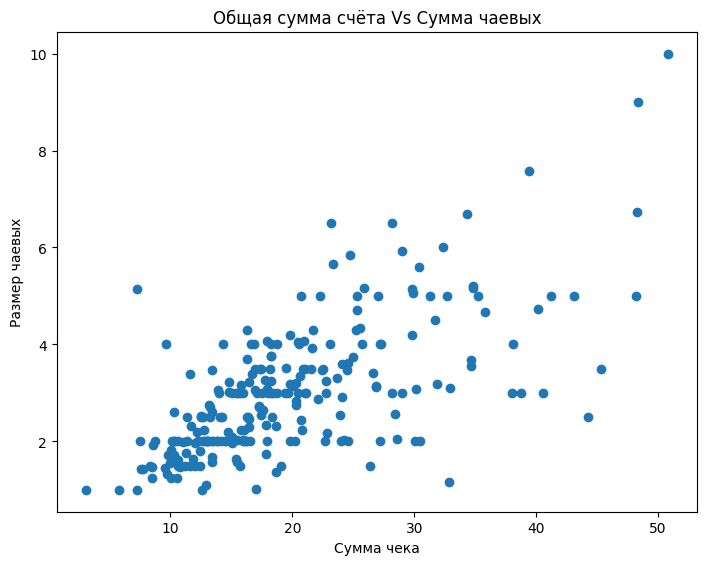

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')
fig

In [ ]:
# В основную координатную плоскость разместим
# гистограмму распределения признака «Общая сумма счета»,
# а в дополнительную — данные о максимальном и минимальном значении
# этого признака по дням недели.

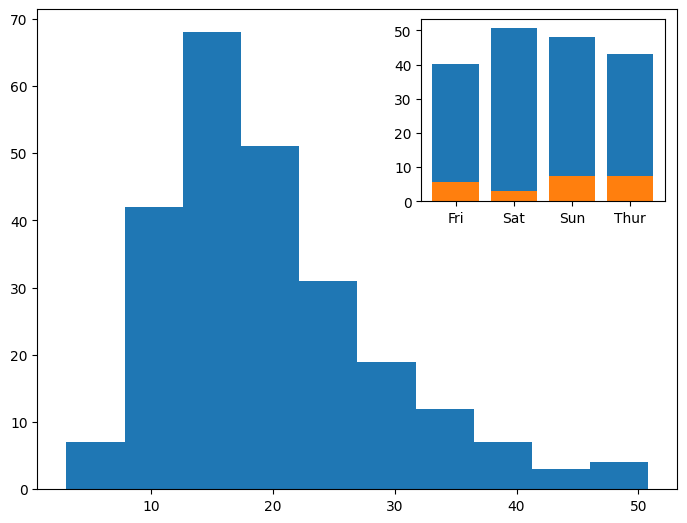

In [ ]:
bills_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()

fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'])
fig

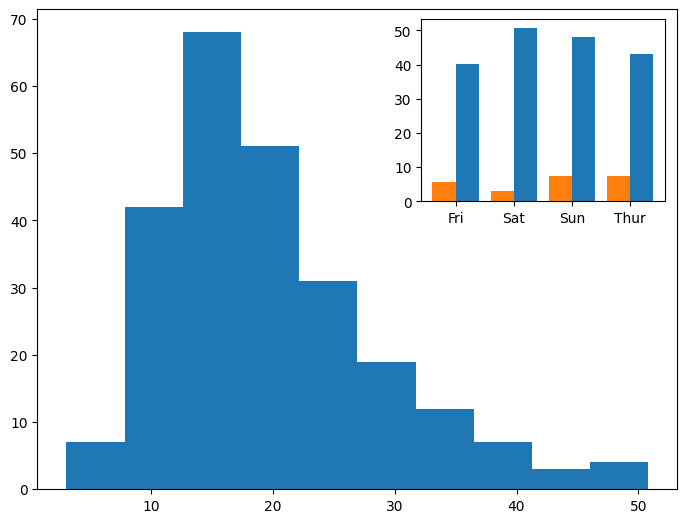

In [ ]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'],
                width = 0.4, align = 'edge')
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'],
                width = -0.4, align = 'edge')
fig

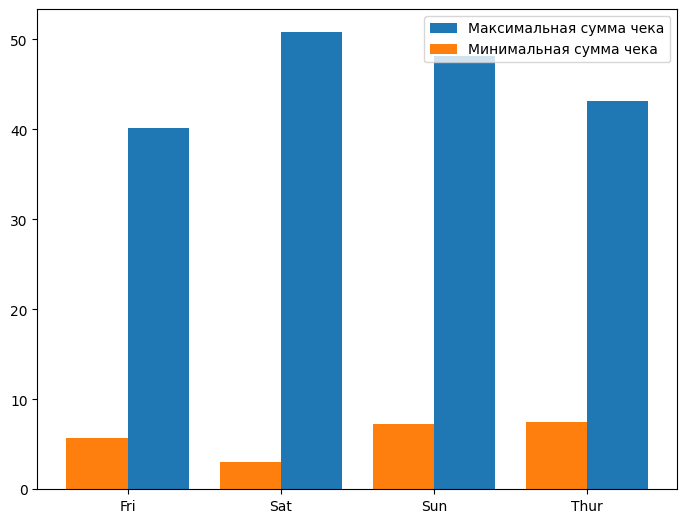

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = bills_per_day['day'], height = bills_per_day['max'],
                width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = bills_per_day['day'], height = bills_per_day['min'],
                width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc = 1)
fig

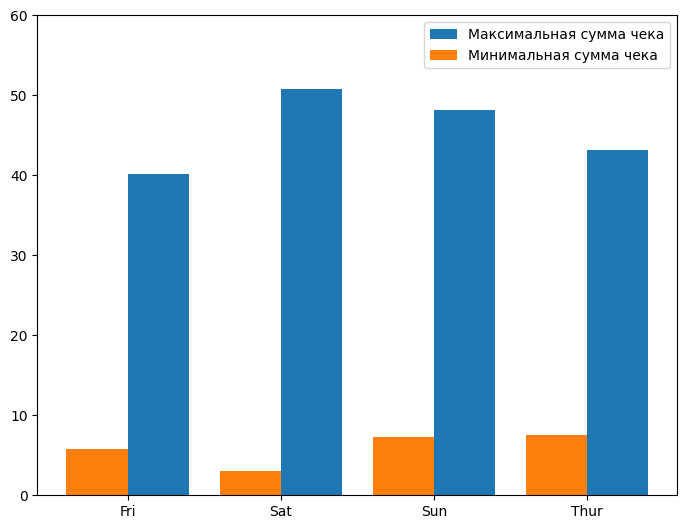

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0, 60)
axes.bar(x = bills_per_day['day'], height = bills_per_day['max'],
                width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = bills_per_day['day'], height = bills_per_day['min'],
                width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc = 1)
fig

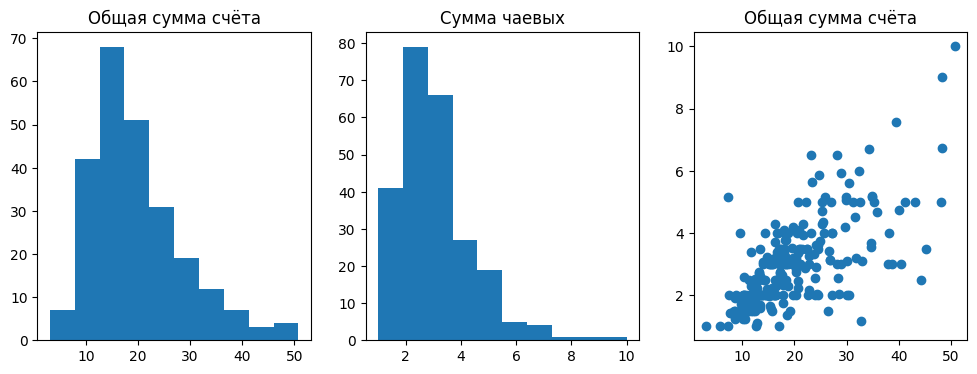

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
axes[0].hist(df['total_bill'])
axes[0].set_title('Общая сумма счёта')

axes[1].hist(df['tip'])
axes[1].set_title('Сумма чаевых')

axes[2].scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes[2].set_title('Общая сумма счёта')
fig

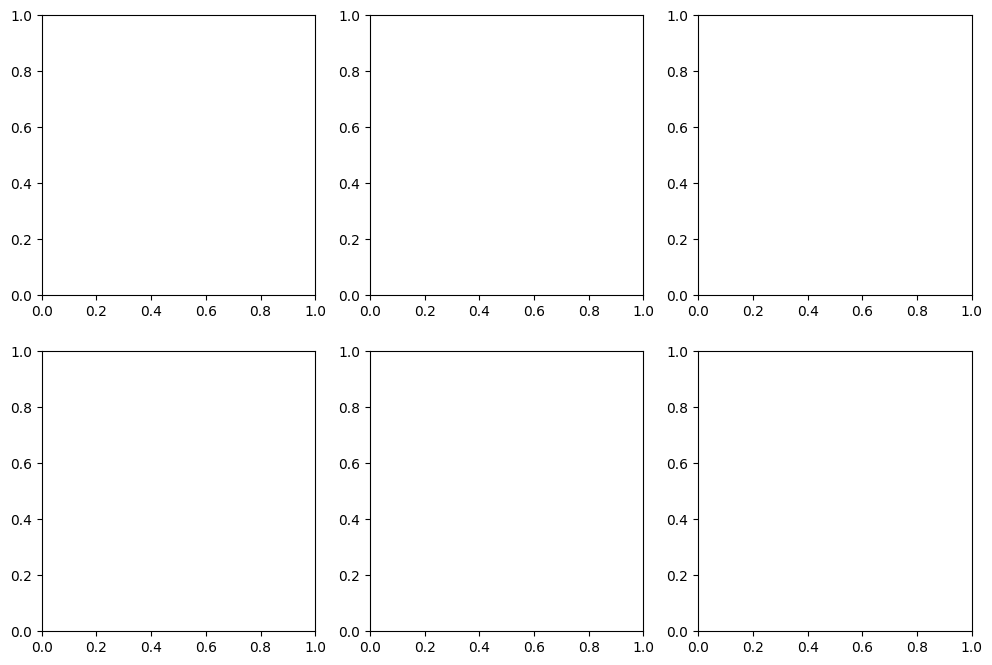

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12,8))
fig

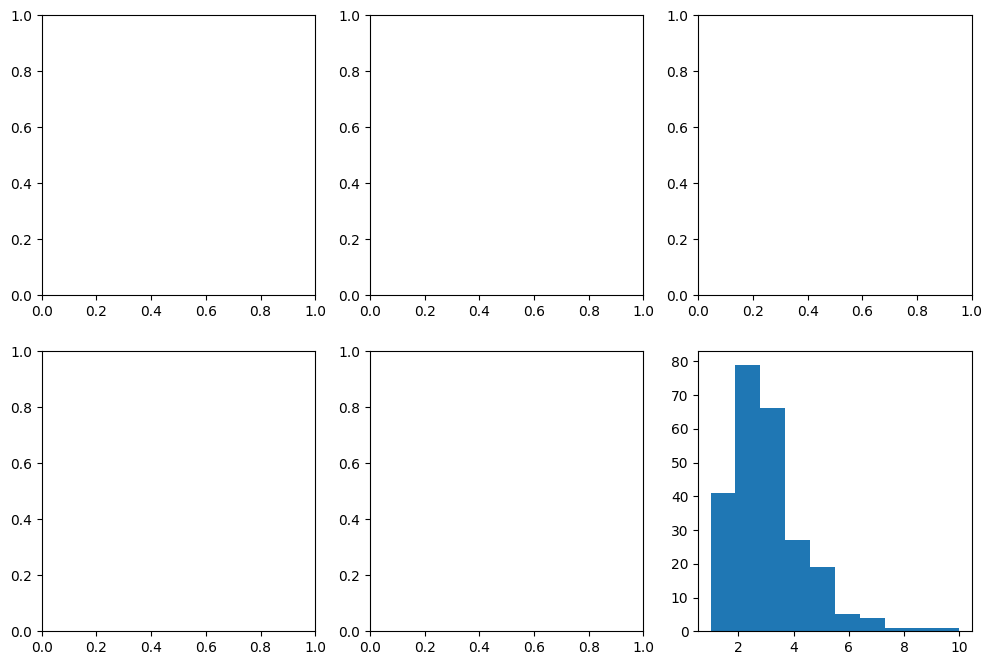

In [ ]:
axes[1][2].hist(df['tip'])
fig

10.8 Создание линейных графиков

In [ ]:
import numpy as np

In [ ]:
# Теперь сгенерируем массив из 1000 чисел, равномерно распределённых
# в интервале от -3 до 3. Также создадим переменную, содержащую
# значения функции e^x на отрезке [-3, 3]
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)

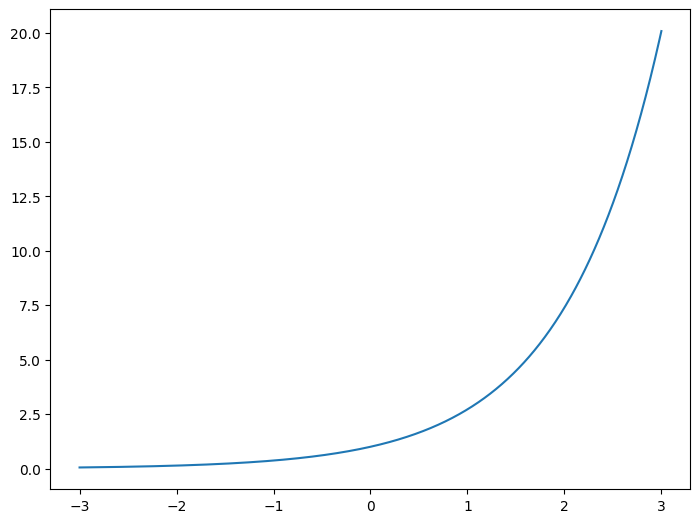

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1)
fig

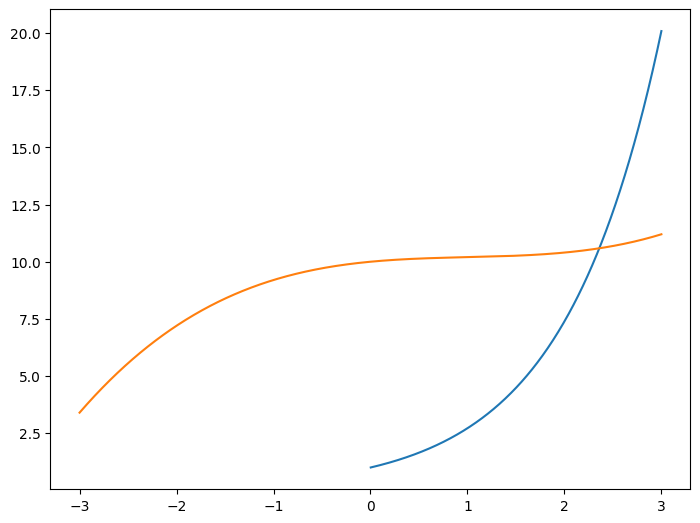

In [ ]:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[500:], y1[500:])
axes.plot(x, y2)
fig

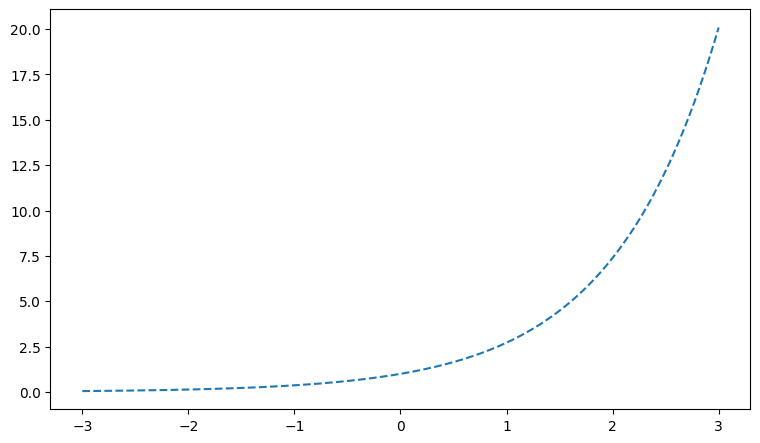

In [ ]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1, linestyle='--')
fig

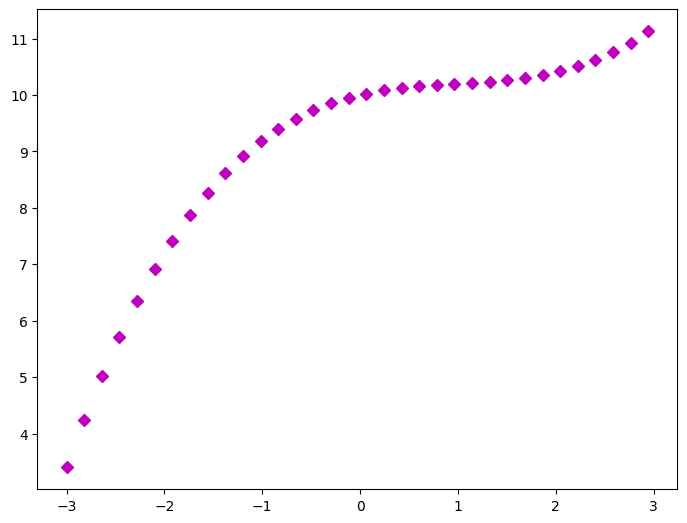

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[::30], y2[::30], 'mD')
fig

10.9 Гистограммы распределения признаков

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings;
warnings.simplefilter('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Python/tips.csv')

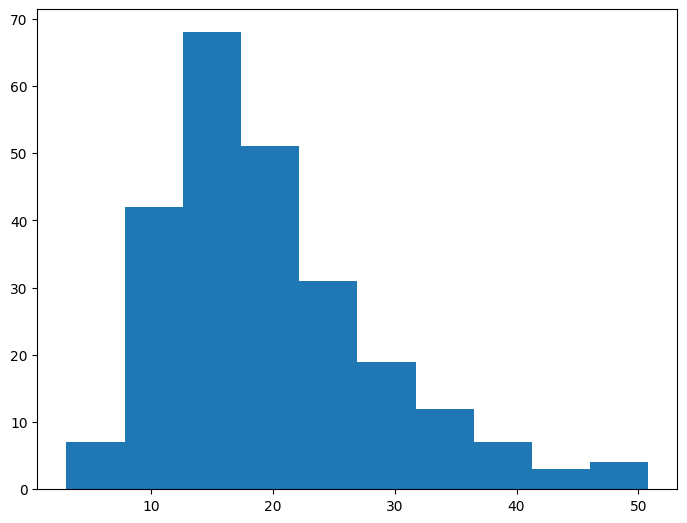

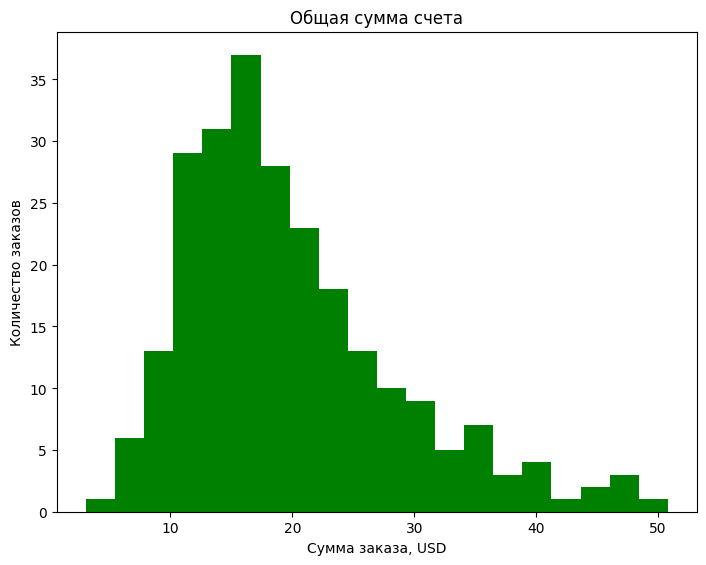

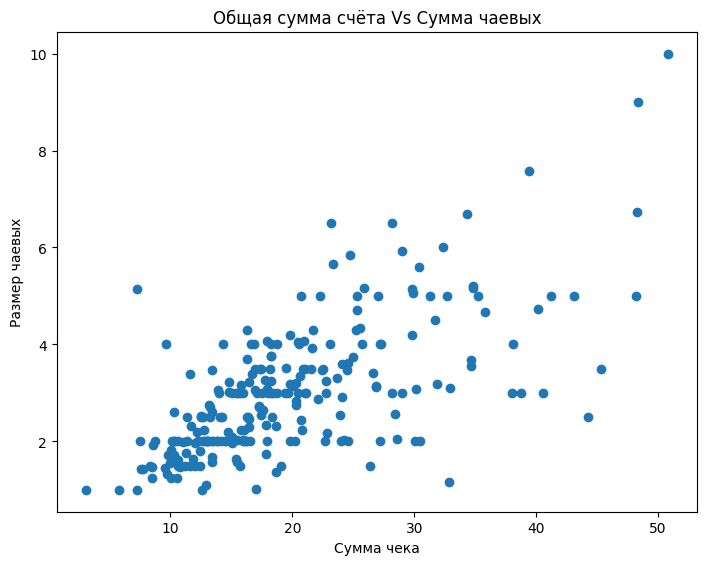

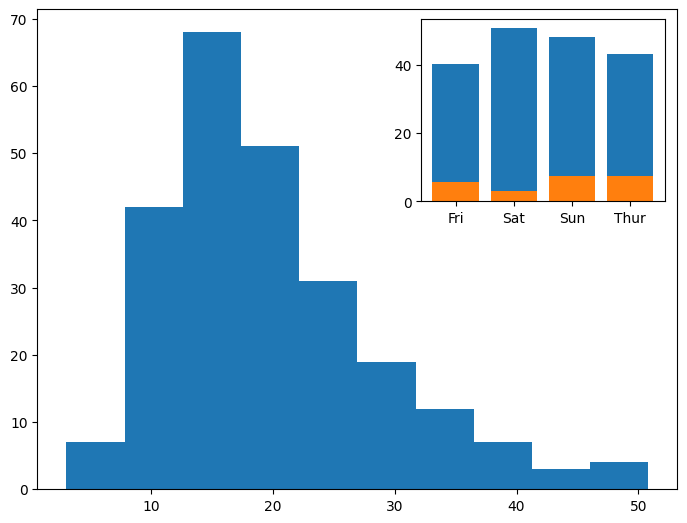

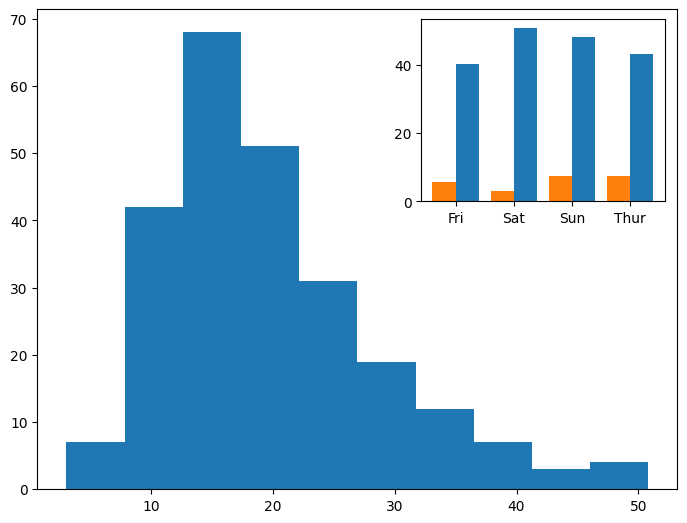

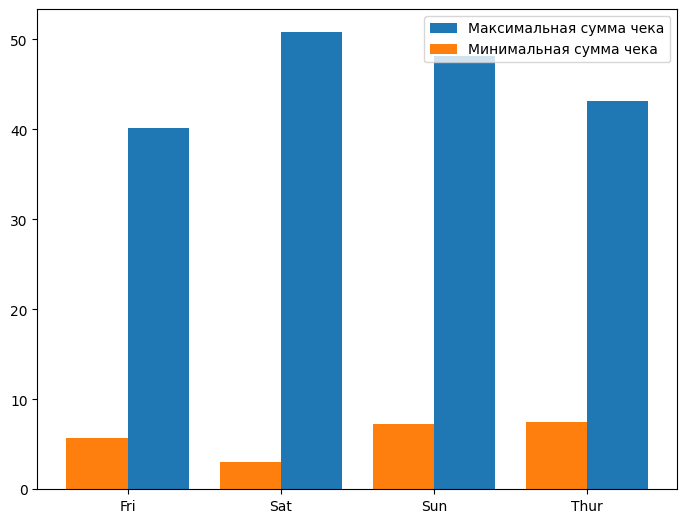

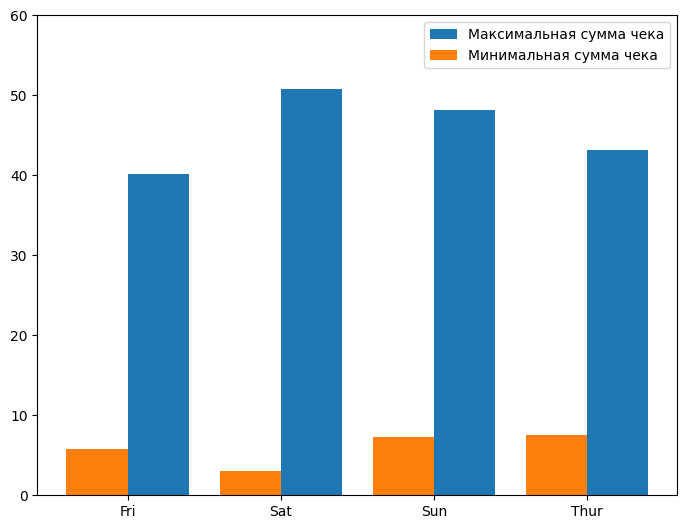

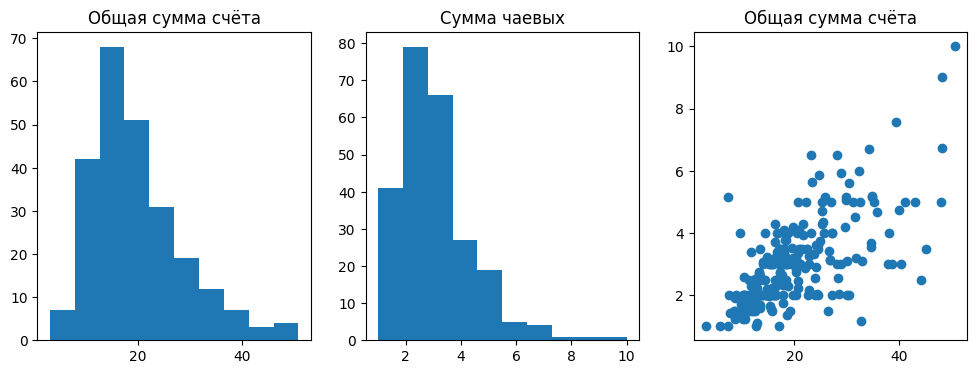

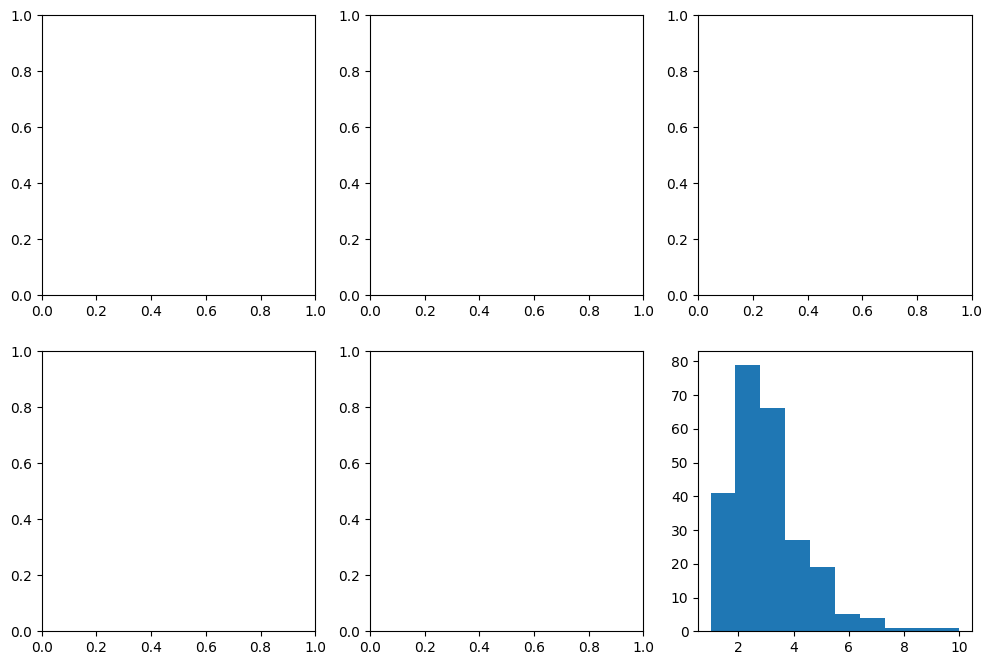

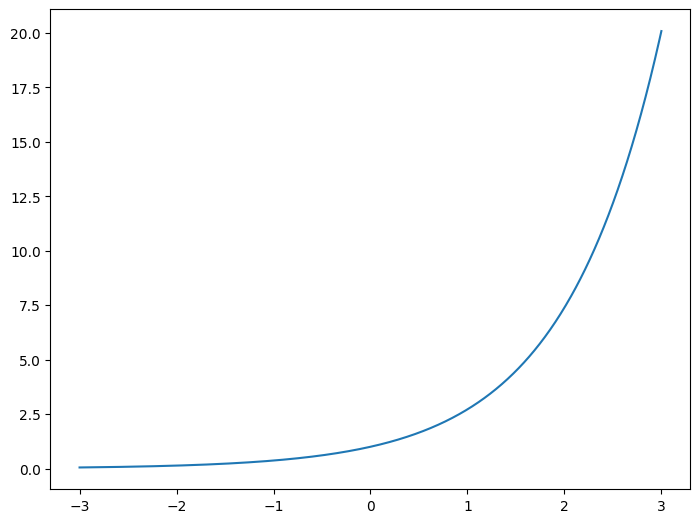

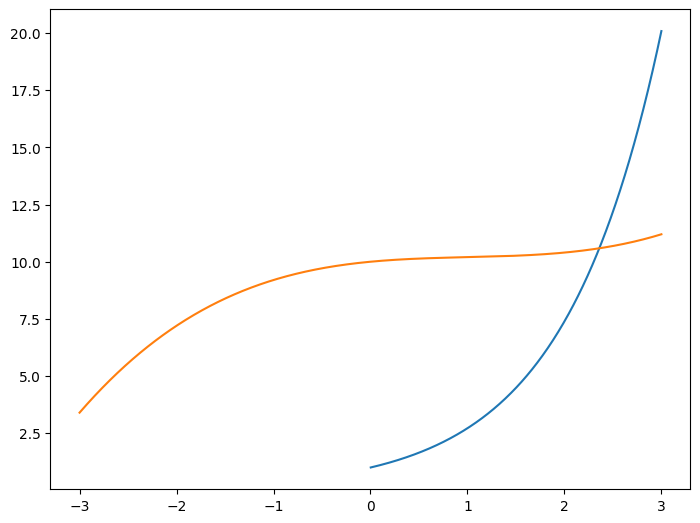

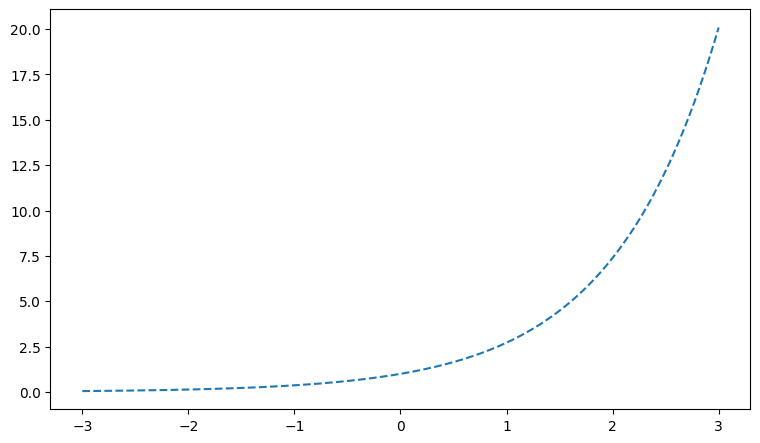

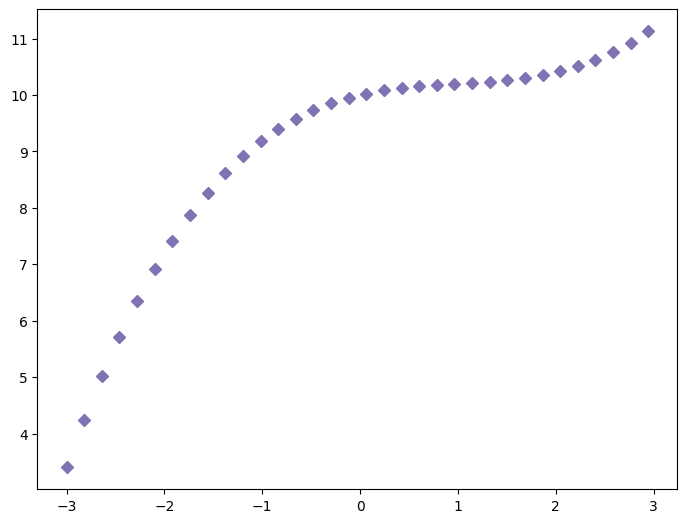

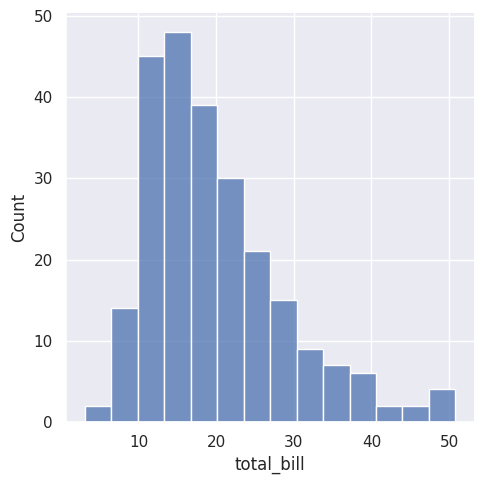

In [ ]:
sns.set()
sns.displot(df['total_bill'])

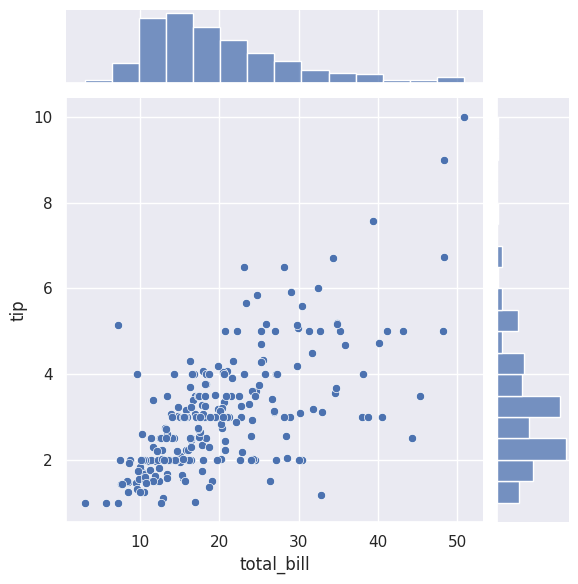

In [ ]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df)

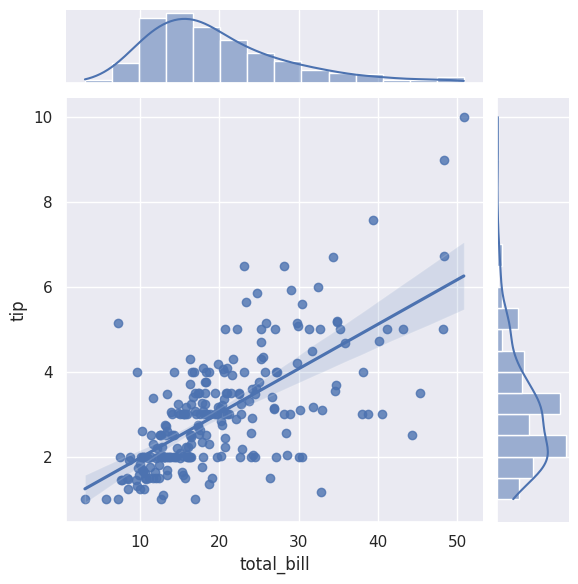

In [ ]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'reg')

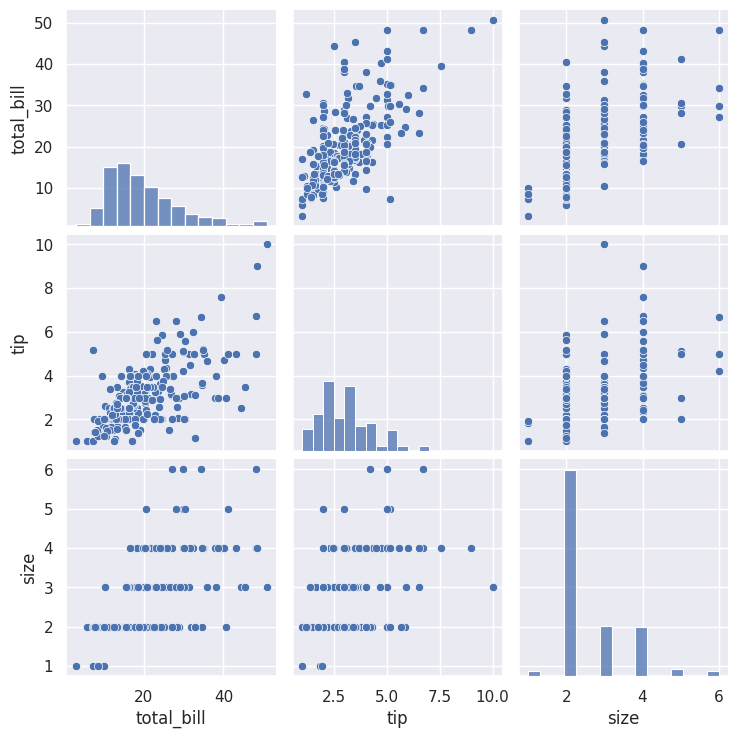

In [ ]:
sns.pairplot(df)

10.10 Работа с категориальными признаками

<Axes: xlabel='day', ylabel='count'>

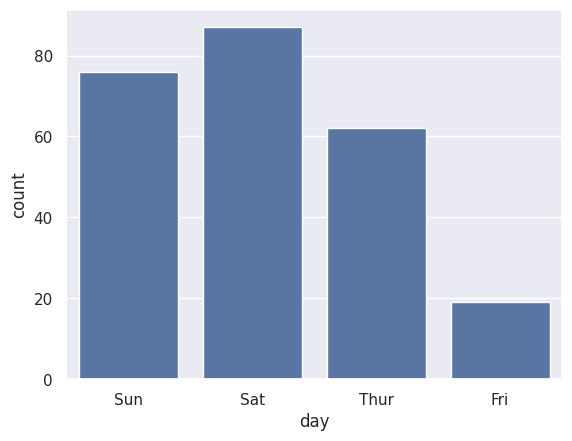

In [ ]:
sns.countplot(x = 'day', data = df)

<Axes: xlabel='sex', ylabel='total_bill'>

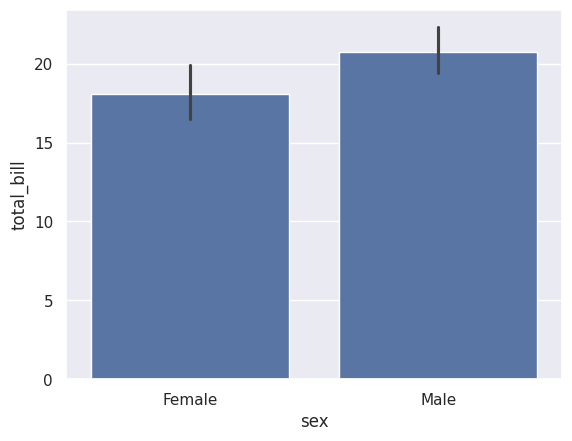

In [ ]:
# по умолчанию, это среднее
sns.barplot(x = 'sex', y = 'total_bill', data = df)

<Axes: xlabel='day', ylabel='tip'>

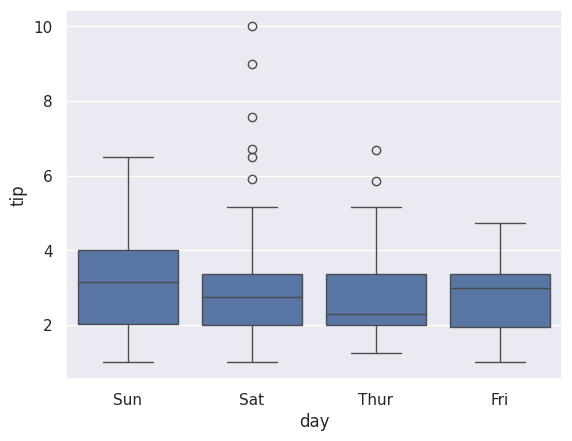

In [ ]:
sns.boxplot(x = 'day', y = 'tip', data = df)

<Axes: xlabel='day', ylabel='tip'>

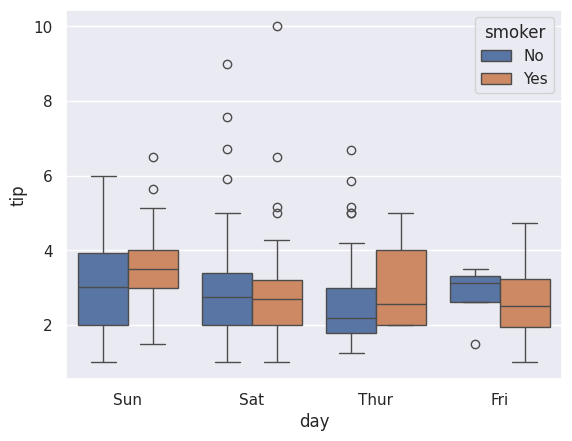

In [ ]:
sns.boxplot(x = 'day', y = 'tip', data = df, hue = 'smoker')

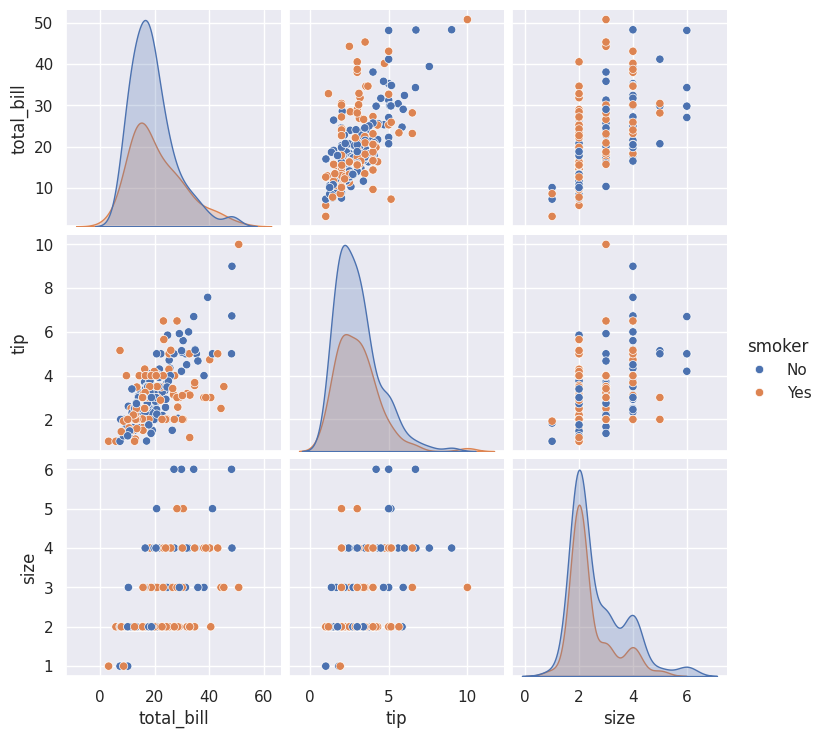

In [ ]:
sns.pairplot(df, hue = 'smoker')

In [ ]:
#correlation = df.corr()
#sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

In [ ]:
!pip install plotly

In [ ]:
!pip install cufflinks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

In [ ]:
init_notebook_mode(connected = True)
cf.go_offline()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Python/tips.csv')

<Axes: >

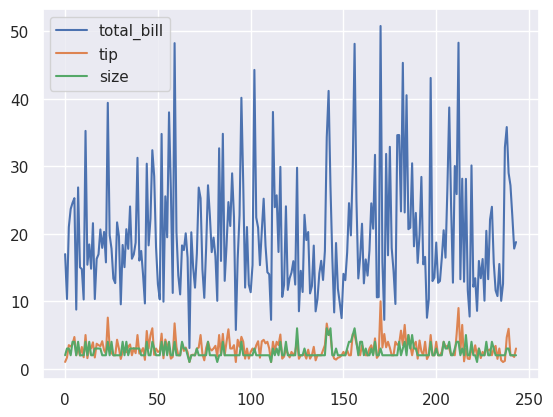

In [ ]:
df.plot()
# df.iplot() чтобы увидеть интерактив